In [1]:
import mcnpy
from pathlib import Path

In [2]:
repo_root = Path.cwd().resolve().parent
inputfile = repo_root / 'examples' / 'data' / 'PWRSphere.i'
mctalfile = repo_root / 'examples' / 'data' / 'PWRSphere.m'

In [3]:
mctal = mcnpy.read_mctal(mctalfile)

In [4]:
mctal.print_summary()

                MCNP MCTAL SUMMARY                

Code:                mcnp6 6
Problem ID:          05/24/24 17:18:48
NPS:                 1.00e+07
Title:               attenuation Sphere for PWR


Tally Type Distribution:
------------------------------
  Tally Type   |   Count    
------------------------------
      F4       |     1      
------------------------------
Total: 1 tallies


Tally Summary:
-----------------------------------------------------
   ID   |  Results   |Energy Bins |       Name       
-----------------------------------------------------
    4   |     3      |     3      |  shell Detector  
-----------------------------------------------------


Perturbation Data Summary:
-----------------------------------
   Tally ID    |  Perturbations   
-----------------------------------
       4       |       1760       
-----------------------------------
Total: 1760 perturbations across 1 tallies




In [5]:
mctal.tally[4]

                        MCNP Tally 4                        

Tally Name:               shell Detector
Number of energy bins:    3
Number of results:        3

  Energy (MeV)      Result          Rel. Error
  ------------    ------------    ------------
  1.000000e-01    2.643730e-09    1.170000e-02   
  1.000000e+00    7.648100e-09    7.100000e-03   
  3.000000e+00    1.066520e-09    1.730000e-02   
  ------------------------------------------------
  Total           1.135840e-08    5.700000e-03   

Perturbation data:        1760 perturbations
TFC data available:       20 points

Available methods:
- .to_dataframe() - Get full data as DataFrame
- .plot_tfc_data() - Visualize convergence
- .perturbation - Access perturbations

In [6]:
sensdata = mcnpy.compute_sensitivity(inputfile, mctalfile, 4, 26056, 'test1')

In [7]:
sensdata

                 Sensitivity Data for Fe-56                 

Label:                           test1
Tally ID:                        4
Tally Name:                      shell Detector
Nuclide (ZAID):                  Fe-56 (26056)
Number of detector energy bins:  3
Number of perturbation bins:     44
Reactions available:             1, 2, 4, 51, 52, 102, 103, 107
Linearity ratios available:      Yes

Energy group ranges:
  - 0.00e+00_1.00e-01
  - 1.00e-01_1.00e+00
  - 1.00e+00_3.00e+00
  - integral


Available methods:
- .plot_sensitivity(energy=None, reaction=None, xlim=None) - Plot sensitivity profiles
- .plot_ratios(energy=None, reaction=None, p_range=None) - Plot Taylor ratio nonlinearity factors
- .to_dataframe() - Get full data as pandas DataFrame

Examples of accessing data:
- .data['0.00e+00_1.00e-01'][1] - Get coefficients for energy bin 0-0.1 MeV, reaction 1
- .data['integral'][2] - Get integral coefficients for reaction 2
- .ratios['0.00e+00_1.00e-01'][1] - Get Taylor ratio 

In [8]:
inputpert = mcnpy.read_mcnp(inputfile).pert

In [9]:
pert_df = mctal.tally[4].perturbation.to_dataframe()

In [10]:
pert_df

,Energy,Result,Error,Perturbation
0,0.1,0.000000e+00,0.0000,1
1,1.0,0.000000e+00,0.0000,1
2,3.0,0.000000e+00,0.0000,1
3,0.1,0.000000e+00,0.0000,2
4,1.0,0.000000e+00,0.0000,2
...,...,...,...,...
5275,1.0,7.648100e-09,0.0071,1759
5276,3.0,1.066520e-09,0.0173,1759
5277,0.1,0.000000e+00,0.0000,1760
5278,1.0,0.000000e+00,0.0000,1760


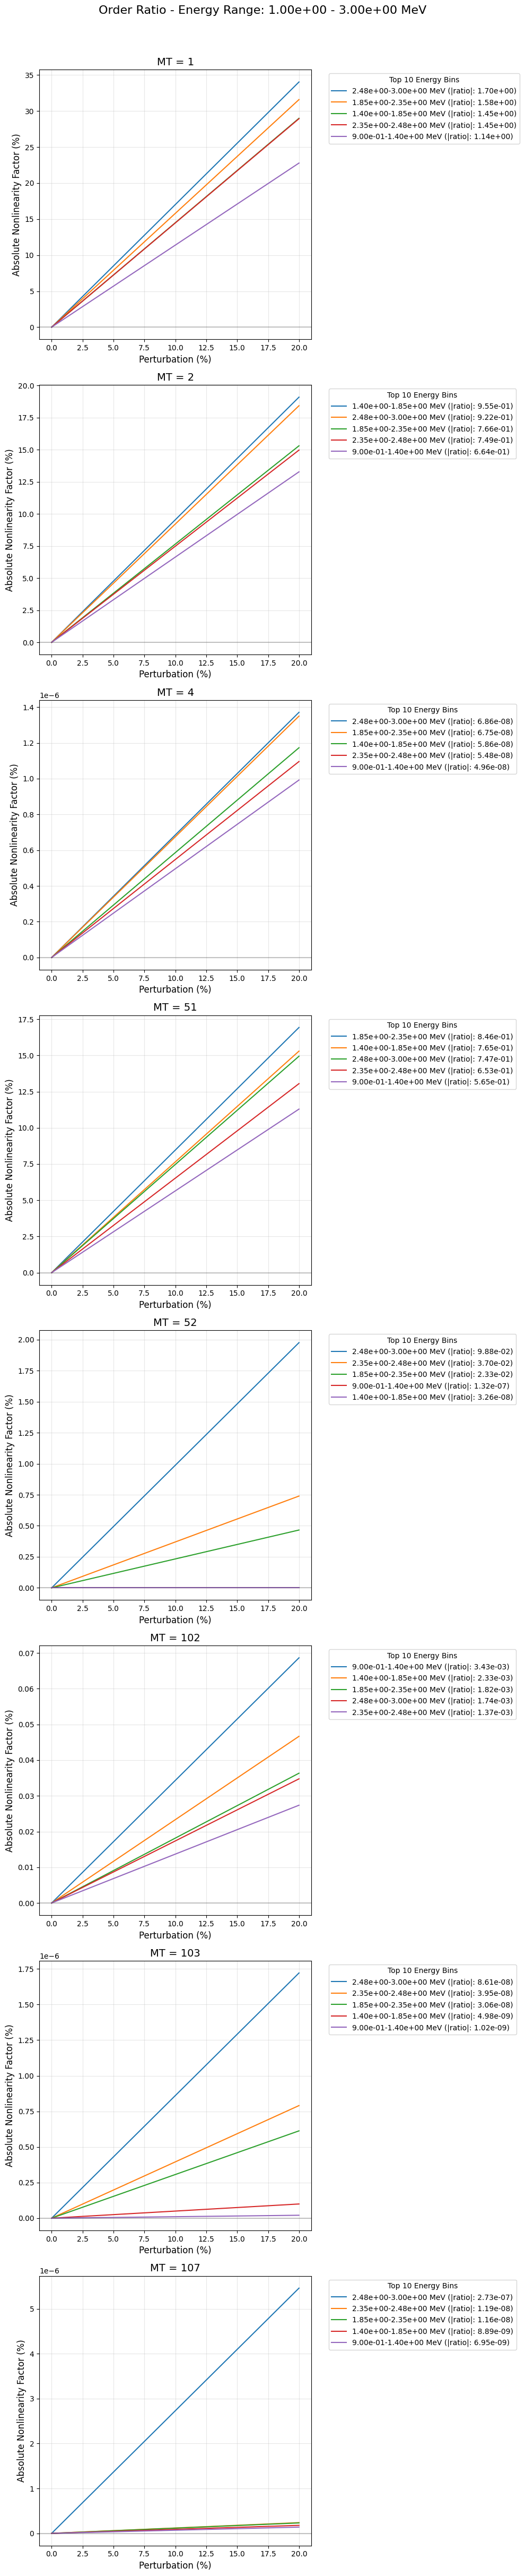

In [11]:
sensdata.plot_ratio(energy=['1.00e+00_3.00e+00'], top_n=10)

<Axes: title={'center': 'MT = 1 (1.00e+00_3.00e+00)'}, xlabel='Perturbation (%)', ylabel='Absolute Nonlinearity Factor (%)'>

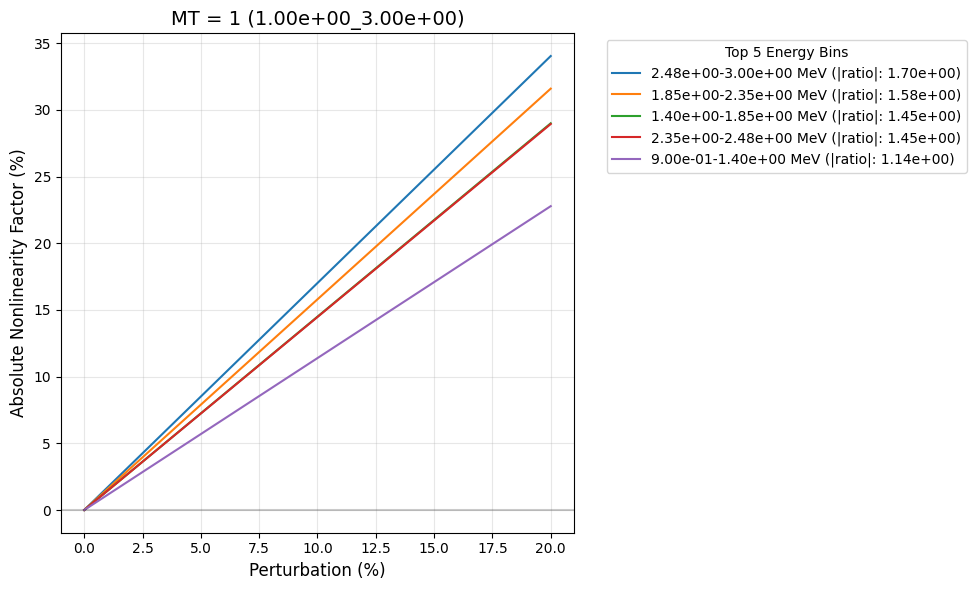

In [12]:
sensdata.ratios['1.00e+00_3.00e+00'][1].plot(top_n = 5)

In [13]:
sensdata.data['0.00e+00_1.00e-01'][1]

             Sensitivity Coefficients             

Energy: 0.00e+00_1.00e-01
Reaction Number (MT): 1
Number of perturbation bins: 44
Unperturbed result (R₀): 2.643730e-09 ± 1.170000e-02

Data preview (values and relative errors):

     Energy Bin     |      Value      |   Rel. Error
----------------------------------------------
1.000e-11-3.000e-09 |    0.000000e+00 |     0.011700
3.000e-09-7.500e-09 |    0.000000e+00 |     0.011700
7.500e-09-1.000e-08 |    0.000000e+00 |     0.011700
...                                           
4.800e+00-6.434e+00 |    0.000000e+00 |     0.011700
6.434e+00-8.187e+00 |    0.000000e+00 |     0.011700
8.187e+00-2.000e+01 |    0.000000e+00 |     0.011700


Available methods:
- .lethargy - Get lethargy intervals as property
- .values_per_lethargy - Get sensitivity per lethargy as property
- .plot(ax=None, xlim=None) - Plot sensitivity coefficients
- .to_dataframe() - Export data as pandas DataFrame with columns:
    energy, reaction, e_lower, e_upper, s

In [14]:
sensdata.plot(energy=['0.00e+00_1.00e-01','1.00e-01_3.00e+00'], reaction=[1, 2,51], xlim=[0, 7.5])

AttributeError: 'SensitivityData' object has no attribute 'plot'